In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
import tensorflow as tf

# Descargue manualmente el modelo y colóquelo en el directorio C: \ Users \ nombre de usuario \ .keras \ models, la dirección de descarga es la siguiente:
# https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels.h5
# https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

# Cargar modelo e imprimir
model = VGG16()
print(model.summary())


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

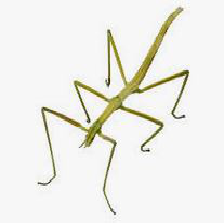

In [16]:
# Cargar una imagen de prueba
# tigre.jpg, tigre.jpg, gato03.jpg, violin.png, panda.png, leon.png
#image = load_img("leon.png", target_size=(224, 224))
image = load_img("stick_insect01.jpg", target_size=(224, 224))

image

In [17]:
  # Convertir a matriz
image = img_to_array(image)
print("Imagen convertida en matriz --> ", image.shape)

  # Reformar en 4D
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
print("Imagen en 4D --> ", image.shape)

  # Imagen de preproceso   
image = preprocess_input(image)
print("Resultado del preprocesamiento --> ", image.shape)

  # Pronóstico
predict_result = model.predict(image)

  # Resultados de predicción de análisis
label = decode_predictions(predict_result)
label

Imagen convertida en matriz -->  (224, 224, 3)
Imagen en 4D -->  (1, 224, 224, 3)
Resultado del preprocesamiento -->  (1, 224, 224, 3)
1/1 [==============================] - 1s 756ms/step


[[('n02231487', 'walking_stick', 0.76080716),
  ('n02236044', 'mantis', 0.22499628),
  ('n02229544', 'cricket', 0.0075832033),
  ('n02226429', 'grasshopper', 0.005152063),
  ('n02259212', 'leafhopper', 0.00023731649)]]

In [18]:
  # Imprima las tres categorías con mayor probabilidad
for idx in range(0, 3):
    categoria = label[0][idx][1]
    prob = label[0][idx][2]
    print("|{:<15}|{:>10.6f}|".format(categoria, prob))

# Limpiar
#tf.keras.backend.clear_session()


# ""

|walking_stick  |  0.760807|
|mantis         |  0.224996|
|cricket        |  0.007583|
